In [1]:
import scanpy as sc

In [2]:
from bbtnn.tnn_v3 import *

Using TensorFlow backend.


In [3]:
sc.set_figure_params(dpi_save = 300)
sc.settings.figdir = "/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/figures/"

In [4]:
%%capture
adata = sc.read("/Users/lsimon/Dropbox/Platelet/BBTNN/Merge_filter.h5")
sc.pp.recipe_zheng17(adata, n_top_genes = 3000)
sc.pp.neighbors(adata, n_neighbors = 20, n_pcs = 50)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [ ]:
sc.pl.umap(adata, color = ["batch", "Celltypes"])#, save = "_pancreas_standard.pdf")

In [5]:
from bbtnn.tnn_v3 import *

In [6]:
%%time
model = TNN(k = 50, batch_size = 32, k_to_m_ratio = 1, n_epochs_without_progress = 5, verbose = 2)
model.fit(X = adata, batch_name = "batch", Y = None)
embedding = model.transform(X = adata)

Calculating MNNs...
Processing datasets (0, 1)
Processing datasets (0, 2)
Processing datasets (0, 3)
Processing datasets (1, 2)
Processing datasets (1, 3)
Processing datasets (2, 3)
6442 cells defined as MNNs
Calculating KNNs
6442 cells defined as KNNs
Reorder
knn gen


W0402 13:04:33.398178 16332 deprecation.py:323] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0402 13:04:33.543000 16332 deprecation.py:506] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Training neural network
Epoch 1/1000
403/403 - 4s - loss: 0.9417
Epoch 2/1000
403/403 - 2s - loss: 0.4957
Epoch 3/1000
403/403 - 2s - loss: 0.4093
Epoch 4/1000
403/403 - 2s - loss: 0.3710
Epoch 5/1000
403/403 - 2s - loss: 0.3509
Epoch 6/1000
403/403 - 2s - loss: 0.3238
Epoch 7/1000
403/403 - 2s - loss: 0.3127
Epoch 8/1000
403/403 - 2s - loss: 0.2990
Epoch 9/1000
403/403 - 2s - loss: 0.2881
Epoch 10/1000
403/403 - 2s - loss: 0.2870
Epoch 11/1000
403/403 - 2s - loss: 0.2730
Epoch 12/1000
403/403 - 2s - loss: 0.2732
Epoch 13/1000
403/403 - 2s - loss: 0.2735
Epoch 14/1000
403/403 - 2s - loss: 0.2716
Epoch 15/1000
403/403 - 2s - loss: 0.2635
Epoch 16/1000
403/403 - 2s - loss: 0.2561
Epoch 17/1000
403/403 - 2s - loss: 0.2555
Epoch 18/1000
403/403 - 2s - loss: 0.2518
Epoch 19/1000
403/403 - 2s - loss: 0.2471
Epoch 20/1000
403/403 - 2s - loss: 0.2440
Epoch 21/1000
403/403 - 2s - loss: 0.2441
Epoch 22/1000
403/403 - 2s - loss: 0.2343
Epoch 23/1000
403/403 - 2s - loss: 0.2383
Epoch 24/1000
403/4

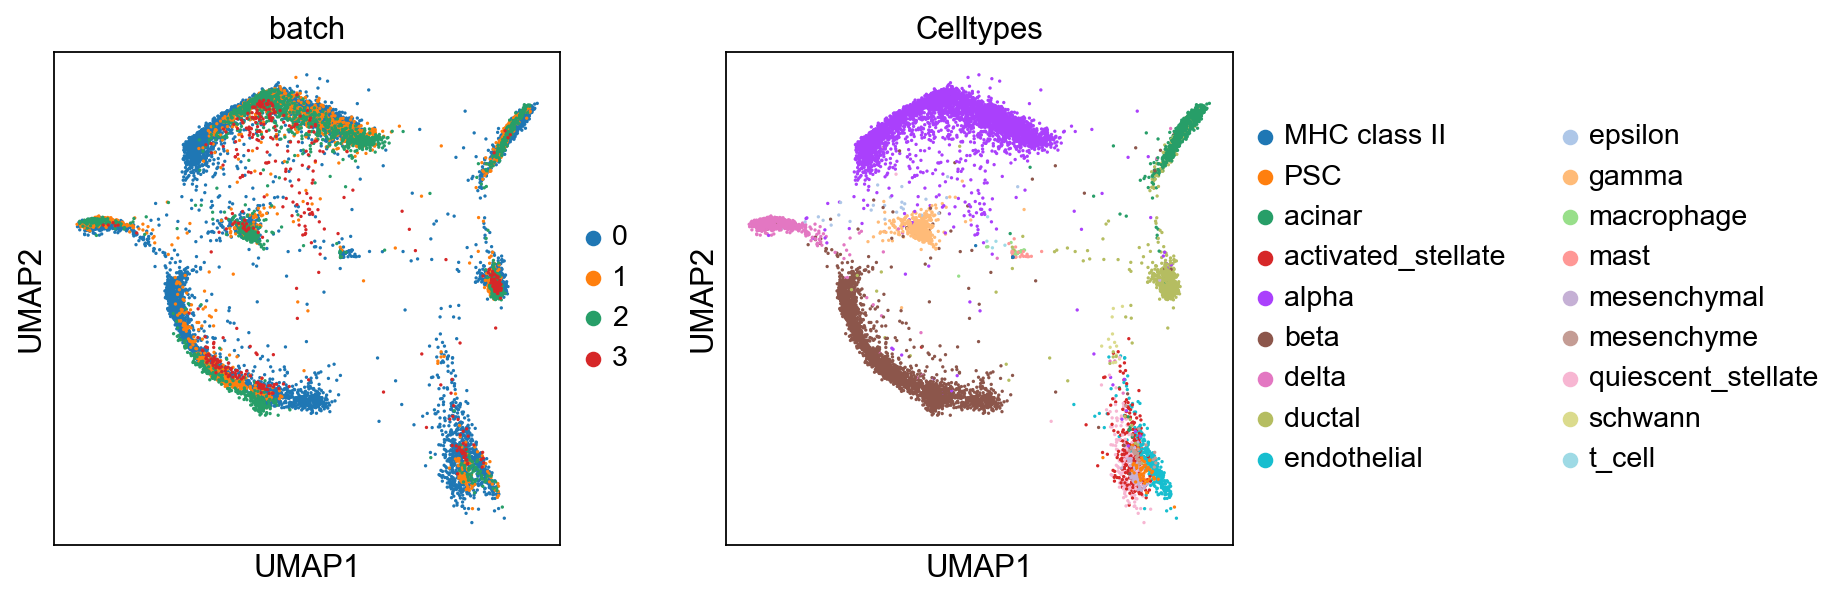

In [7]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "Celltypes"])#, save = "_pancreas_tnn.pdf")

### Add supervision to loss function

In [8]:
labels = adata.obs["Celltypes"]

In [9]:
%%time
model = TNN(k = 50, batch_size = 32, k_to_m_ratio = 1, n_epochs_without_progress = 5, verbose = 2)
model.fit(X = adata, batch_name = "batch", Y = labels)
embedding = model.transform(X = adata)

Calculating MNNs...
Processing datasets (0, 1)
Processing datasets (0, 2)
Processing datasets (0, 3)
Processing datasets (1, 2)
Processing datasets (1, 3)
Processing datasets (2, 3)
6441 cells defined as MNNs
Calculating KNNs
6441 cells defined as KNNs
Reorder
supervised gen
Training neural network
Epoch 1/1000


ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 5],
       [ 2],
       [ 5],
       [ 4],
       [ 5],
       [ 5],
       [ 3],
       [15],
       [ 8],
       [15],
       [ 7],
    ...

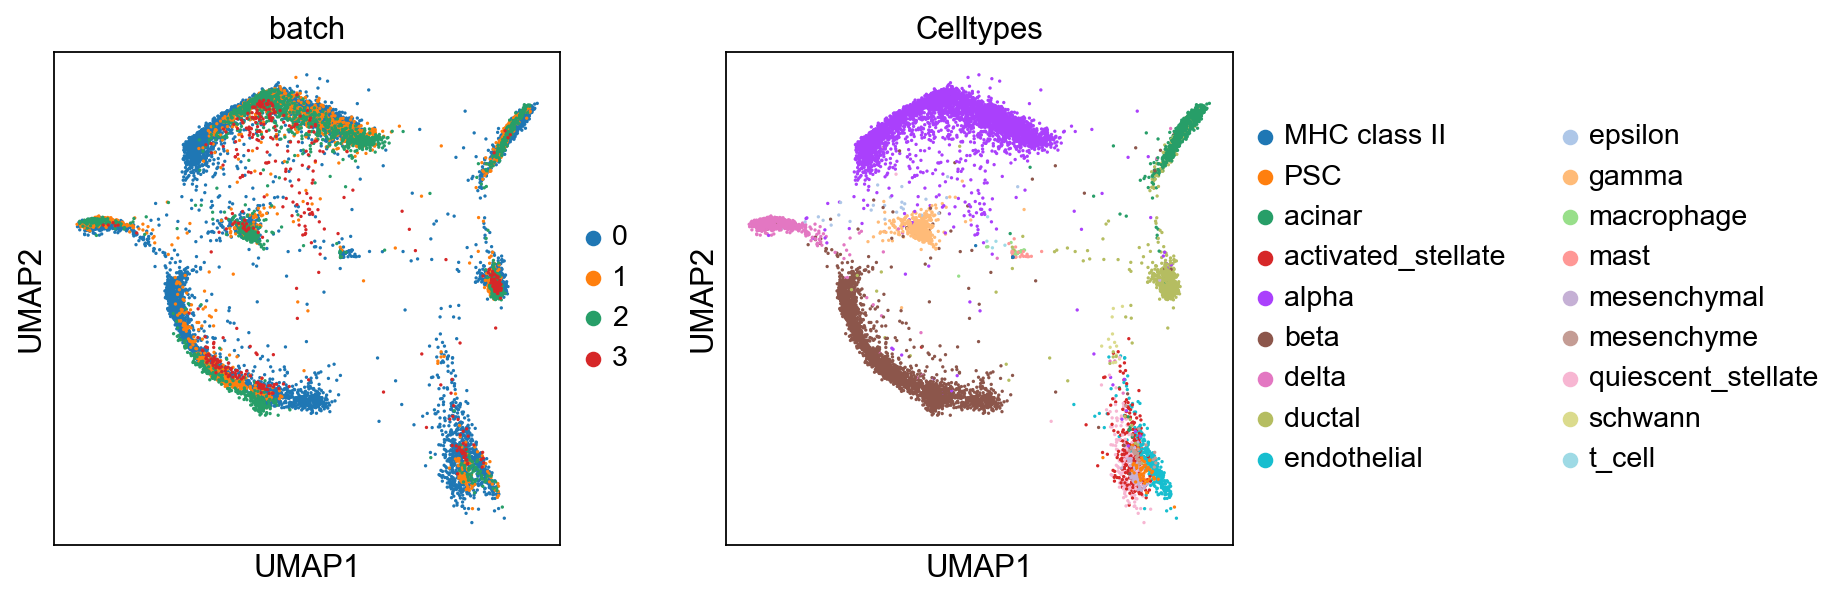

In [10]:
adata.obsm["X_umap"] = embedding
sc.pl.umap(adata, color = ["batch", "Celltypes"])#, legend_loc = "on data")

### Add semi-supervision to loss function

In [ ]:
mask = np.random.choice(range(len(Y_train)), size=len(Y_train) // 2, replace=False)
Y_train_masked = np.array(Y_train, dtype=np.int8) # Can't use uint to represent
Y_train_masked[mask] = -1